Importing Libraries


In [36]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib import cm
from matplotlib import animation,rc
from IPython.display import HTML
import numpy as np


In [66]:
class Sigmoid_Neuron:
    def __init__(self,w_init,b_init,algo):
        self.w=w_init
        self.b=b_init
        self.w_h=[]
        self.b_h=[]
        self.e_h=[]
        self.algo=algo
    
    def sigmoid(self,x,w=None,b=None):
        if w is None:
            w=self.w
        if b is None:
            b=self.b
        return 1/(1+np.exp(-(w*x+b)))
    
    def error(self,X,Y,w=None,b=None):
        if w is None:
            w=self.w
        if b is None:
            b=self.b
        error=0
        for x,y in zip(X,Y):
            error+=0.5*(self.sigmoid(x,w,b)-y)**2
        return error
    
    def grad_w(self,x,y,w=None,b=None):
        if w is None:
            w=self.w
        if b is None:
            b=self.b
        y_pred=self.sigmoid(x,w,b)
        return (y_pred-y)*y_pred*(1-y_pred)*x
    
    def grad_b(self,x,y,w=None,b=None):
        if w is None:
            w=self.w
        if b is None:
            b=self.b
        y_pred=self.sigmoid(x,w,b)
        return (y_pred-y)*y_pred*(1-y_pred)
    
    def fit(self,X,Y, epochs=1,eta=1,gamma=0.9,beta=0.9,beta1=0.9,beta2=0.9,mini_batch_size=100,eps=1e-8):
        self.w_h=[]
        self.b_h=[]
        self.e_h=[]
        self.X=X
        self.Y=Y
        
        if (self.algo=="GD"):
            for i in range(epochs):
                dw=0
                db=0
                for x,y in zip(X,Y):
                    dw+=self.grad_w(x,y)
                    db+=self.grad_b(x,y)
                self.w-=eta*dw/X.shape[0]
                self.b-=eta*db/X.shape[0]
                self.append_log()
                
        elif (self.algo=="Momentum"):
            v_w_prev=v_b_prev=0
            for i in range(epochs):
                dw=0
                db=0
                for x,y in zip(X,Y):
                    dw+=self.grad_w(x,y)
                    db+=self.grad_b(x,y)
                v_w=gamma*v_w_prev + eta*dw
                v_b=gamma*v_b_prev + eta*db
                self.w-=v_w
                self.b-=v_b
                v_w_prev=v_w
                v_b_prev=v_b
                self.append_log()
        
        elif (self.algo=="NAG"):
            v_w_prev=v_b_prev=0
            for i in range(epochs):
                dw=0
                db=0
                v_w=gamma*v_w_prev
                v_b=gamma*v_b_prev
                for x,y in zip(X,Y):
                    dw+=self.grad_w(x,y,self.w-v_w,self.b-v_b)
                    db+=self.grad_b(x,y,self.w-v_w,self.b-v_b)
                v_w=gamma*v_w_prev + eta*dw
                v_b=gamma*v_b_prev + eta*db
                self.w-=v_w
                self.b-=v_b
                v_w_prev=v_w
                v_b_prev=v_b
                self.append_log()
        
        elif(self.algo=="MiniBatch"):
            for i in range(epochs):
                dw=0
                db=0
                points_seen=0
                for x,y in zip(X,Y):
                    dw+=self.grad_w(x,y)
                    db+=self.grad_b(x,y)
                    if(points_seen%mini_batch_size==0):
                        self.w-=eta*dw/X.shape[0]
                        self.b-=eta*db/X.shape[0]
                        self.append_log()
                        dw=0
                        db=0
        
        elif(self.algo=="AdaGrad"):
            v_w_prev=v_b_prev=0
            for i in range(epochs):
                dw=0
                db=0
                for x,y in zip(X,Y):
                    dw+=self.grad_w(x,y)
                    db+=self.grad_b(x,y)
                v_w=v_w_prev+dw**2
                v_b=v_b_prev+db**2
                self.w-=(eta/(np.sqrt(v_w)+eps))*dw
                self.b-=(eta/(np.sqrt(v_b)+eps))*db
                v_w_prev=v_w
                v_b_prev=v_b
                self.append_log()
        
        elif(self.algo=="RMSProp"):
            v_w_prev=v_b_prev=0
            for i in range(epochs):
                dw=0
                db=0
                for x,y in zip(X,Y):
                    dw+=self.grad_w(x,y)
                    db+=self.grad_b(x,y)
                v_w=beta*v_w_prev+(1-beta)*(dw**2)
                v_b=beta*v_b_prev+(1-beta)*(db**2)
                self.w-=(eta/(np.sqrt(v_w)+eps))*dw
                self.b-=(eta/(np.sqrt(v_b)+eps))*db
                v_w_prev=v_w
                v_b_prev=v_b
                self.append_log()
        
        elif(self.algo=="Adam"):
            v_w,v_b=0,0
            m_w,m_b=0,0
            num_updates=0
            for i in range(epochs):
                dw,db=0,0
                for x,y in zip(X,Y):
                    dw+=self.grad_w(x,y)
                    db+=self.grad_b(x,y)
                    num_updates+=1
                    m_w = beta1 * m_w + (1-beta1) * dw
                    m_b = beta1 * m_b + (1-beta1) * db
                    v_w = beta2 * v_w + (1-beta2) * dw**2
                    v_b = beta2 * v_b + (1-beta2) * db**2
                    m_w_c = m_w / (1 - np.power(beta1,num_updates))
                    m_b_c = m_b / (1 - np.power(beta1,num_updates))
                    v_w_c = v_w / (1 - np.power(beta1,num_updates))
                    v_b_c = v_b / (1 - np.power(beta1,num_updates))
                    self.w -= (eta / (np.sqrt(v_w_c) + eps)) * m_w_c
                    self.b -= (eta / (np.sqrt(v_b_c) + eps)) * m_b_c
                    self.append_log()
    
    def append_log(self):
        self.w_h.append(self.w)
        self.b_h.append(self.b)
        self.e_h.append(self.error(self.X,self.Y))
    
    
            
            
            
            
            
        

In [75]:
X=np.asarray([0.5,2.5])
Y=np.asarray([0.2,0.9])

algo="GD"

w_init = -1
b_init = -2

epochs = 1000
eta = 1
w_min = -7
w_max = 5
b_min = -5
b_max = 5

animation_frames = 20
plot_3d = False
plot_2d = True


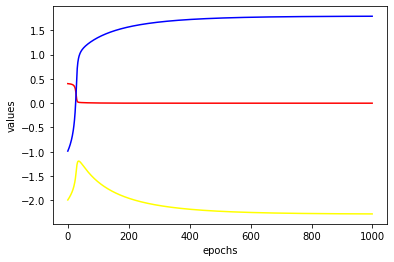

In [76]:
sn=Sigmoid_Neuron(w_init,b_init,algo)
sn.fit(X,Y,epochs=epochs,eta=eta)
plt.plot(sn.e_h,color="red")
plt.plot(sn.w_h,color="blue")
plt.plot(sn.b_h,color="yellow")
plt.xlabel("epochs")
plt.ylabel("values")
plt.show()


In [69]:
def plot_animate_3d(i):
    i = int(i * (epochs/animation_frames))
    line1.set_data(sn.w_h[:i+1],sn.b_h[:i+1])
    line1.set_3d_properties(sn.e_h[:i+1])
    line2.set_data(sn.w_h[:i+1],sn.b_h[:i+1])
    line2.set_3d_properties(np.zeros(i+1) - 1)
    title.set_text("Epoch : {: d}, Error: {:.4f}".format(i,sn.e_h[i]))
    return line1, line2, title
    


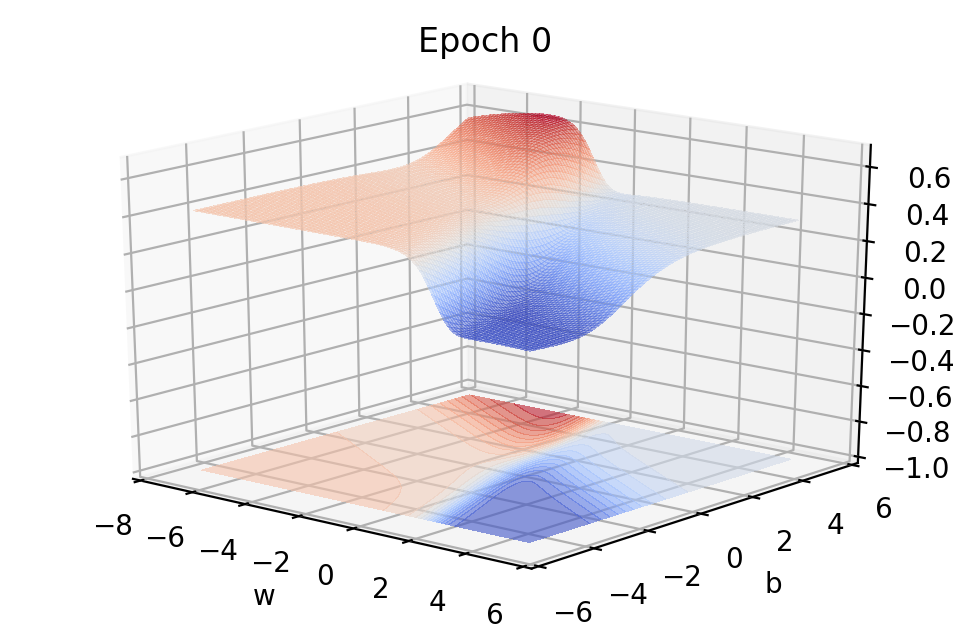

In [70]:
if plot_3d :
    W=np.linspace(w_min,w_max,256)
    b=np.linspace(b_min,b_max,256)
    WW, BB =np.meshgrid(W,b)
    Z=sn.error(X,Y,WW,BB)
    
    fig=plt.figure(dpi=200) #dpi=dots_per_inches
    ax=fig.gca(projection="3d") #ax=axis handle
    surf=ax.plot_surface(WW,BB,Z,rstride=3,cstride=3,alpha=0.5,cmap=cm.coolwarm,linewidth=0,antialiased=False)
    cset=ax.contourf(WW,BB,Z,25,zdir="z",offset=-1,alpha=0.6,cmap=cm.coolwarm)
    ax.set_xlabel("w")
    ax.set_xlim(w_min-1,w_max+1)
    ax.set_ylabel("b")
    ax.set_ylim(b_min-1,b_max+1)
    ax.set_zlabel("error")
    ax.set_zlim(-1,np.max(Z))
    ax.view_init(elev=20,azim=-50)
    ax.dist=10
    title=ax.set_title("Epoch 0")

In [71]:
if plot_3d :
    i=0
    line1 =ax.plot(sn.w_h[:i+1],sn.b_h[:i+1],sn.e_h[:i+1],color="black",marker=".")
    line2 =ax.plot(sn.w_h[:i+1],sn.b_h[:i+1],np.zeros(i+1)-1,color="black",marker=".")
    anim=animation.FuncAnimation(fig,func=plot_animate_3d,frames=animation_frames)
    rc('animation',html="jshtml")
    anim

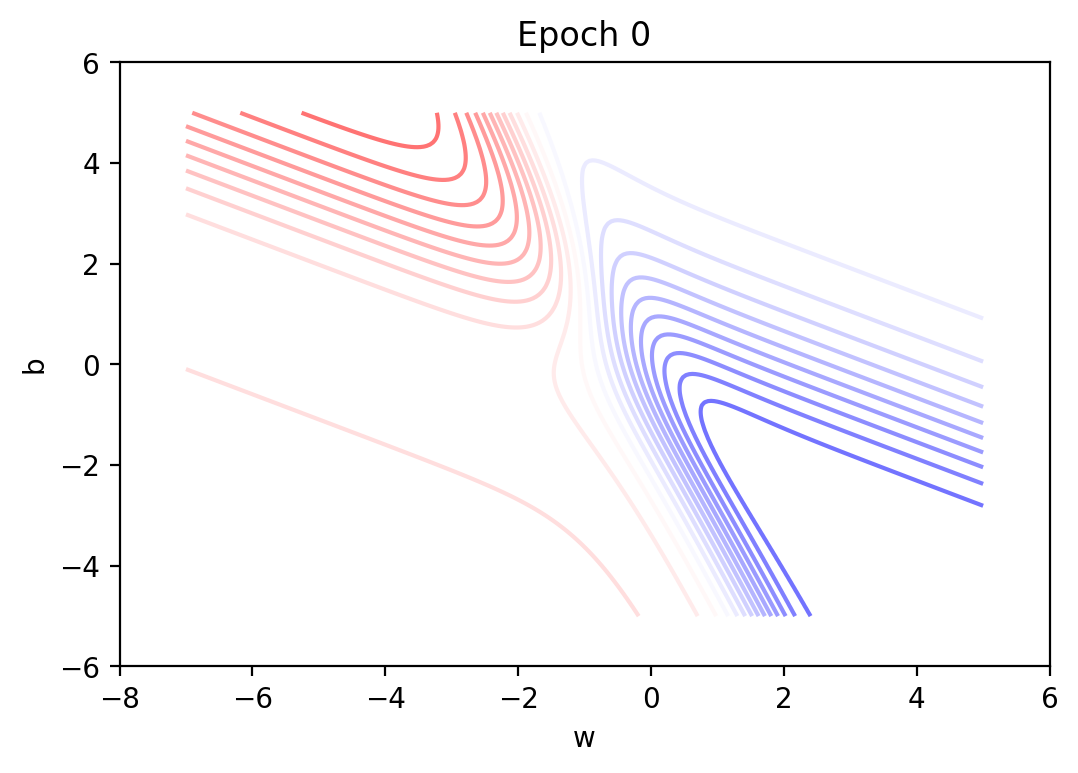

In [77]:
if plot_2d:
    W=np.linspace(w_min,w_max,256)
    b=np.linspace(b_min,b_max,256)
    WW, BB =np.meshgrid(W,b)
    Z=sn.error(X,Y,WW,BB)
    
    fig=plt.figure(dpi=200) #dpi=dots_per_inches
    ax = plt.subplot(111)
    ax.set_xlabel("w")
    ax.set_xlim(w_min-1,w_max+1)
    ax.set_ylabel("b")
    ax.set_ylim(b_min-1,b_max+1)
    title=ax.set_title("Epoch 0")
    cset = plt.contour(WW,BB,Z,25,alpha=0.6,cmap=cm.bwr)
    plt.show()
    

In [78]:
def plot_animate_2d(i):
    i = int(i * (epochs/animation_frames))
    line.set_data(sn.w_h[:i+1],sn.b_h[:i+1])
    title.set_text("Epoch : {: d}, Error: {:.4f}".format(sn.e_h[i]))
    return line, title

In [ ]:
if algo=="GD":
    print("algo = {}, eta = {}".format(algo,eta))
elif algo=="Momentum" or algo=="NAG":
    print("algo = {}, eta = {}, gamma = {}".format(algo,eta,gamma))
elif algo=="MiniBatch":
    print("algo = {}, eta = {}, batch_size = {}".format(algo,eta,mini_batch_size))
elif algo == "AdaGrad" or algo=="RMSProp":
        print("algo = {}, eta = {}, eps = {}".format(algo,eta,eps))
    
anim
        